In [1]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.impute import SimpleImputer
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [9]:

# Python code used to load and clean the data

# 1. Load Books.csv
books_df = pd.read_csv('/content/Books (1).csv', encoding='latin-1')

# 2. Load Ratings.csv
ratings_df = pd.read_csv('/content/Ratings (1).csv', encoding='latin-1')

# 3. Load Users.csv with error handling due to formatting issues
users_df = pd.read_csv('/content/Users (1).csv', encoding='latin-1', on_bad_lines='skip', sep=',', engine='python')


In [10]:
# 🔍 Quick summary function to inspect shape, structure, missing values, and uniqueness of a Books DF

def quick_overview(df):
    print("\n✅ DataFrame Shape:\n", df.shape)
    print("\n📋 DataFrame structure:\n", df.info())
    print("\n🔍 First 5 Rows:\n", df.head())
    print("\n🧹 Missing Values:\n", df.isnull().sum())
    print("\n🔍 NaN:\n",df.isna().sum())
    print("\n🎯 Unique Values per Column:\n", df.nunique())
    #print("\n🎯 Describe all numeric variables:\n", df.describe())

quick_overview (books_df)


✅ DataFrame Shape:
 (3970, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3970 entries, 0 to 3969
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 3970 non-null   object
 1   Book-Title           3970 non-null   object
 2   Book-Author          3970 non-null   object
 3   Year-Of-Publication  3970 non-null   int64 
 4   Publisher            3970 non-null   object
 5   Image-URL-S          3970 non-null   object
 6   Image-URL-M          3970 non-null   object
 7   Image-URL-L          3970 non-null   object
dtypes: int64(1), object(7)
memory usage: 248.3+ KB

📋 DataFrame structure:
 None

🔍 First 5 Rows:
          ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3

In [11]:
# 🔍 Quick summary function to inspect shape, structure, missing values, and uniqueness of a Ratings DF
def quick_overview(df):
    print("\n✅ DataFrame Shape:\n", df.shape)
    print("\n📋 DataFrame structure:\n", df.info())
    print("\n🔍 First 5 Rows:\n", df.head())
    print("\n🧹 Missing Values:\n", df.isnull().sum())
    print("\n🔍 NaN:\n",df.isna().sum())
    print("\n🎯 Unique Values per Column:\n", df.nunique())
    #print("\n🎯 Describe all numeric variables:\n", df.describe())

quick_overview (ratings_df)


✅ DataFrame Shape:
 (221153, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221153 entries, 0 to 221152
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      221153 non-null  int64  
 1   ISBN         221153 non-null  object 
 2   Book-Rating  221149 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ MB

📋 DataFrame structure:
 None

🔍 First 5 Rows:
    User-ID        ISBN  Book-Rating
0   276725  034545104X          0.0
1   276726  0155061224          5.0
2   276727  0446520802          0.0
3   276729  052165615X          3.0
4   276729  0521795028          6.0

🧹 Missing Values:
 User-ID        0
ISBN           0
Book-Rating    4
dtype: int64

🔍 NaN:
 User-ID        0
ISBN           0
Book-Rating    4
dtype: int64

🎯 Unique Values per Column:
 User-ID         20427
ISBN           114843
Book-Rating        11
dtype: int64


In [12]:
# 🔍 Quick summary function to inspect shape, structure, missing values, and uniqueness of Users DF

def quick_overview(df):
    print("\n✅ DataFrame Shape:\n", df.shape)
    print("\n📋 DataFrame structure:\n", df.info())
    print("\n🔍 First 5 Rows:\n", df.head())
    print("\n🧹 Missing Values:\n", df.isnull().sum())
    print("\n🔍 NaN:\n",df.isna().sum())
    print("\n🎯 Unique Values per Column:\n", df.nunique())
    #print("\n🎯 Describe all numeric variables:\n", df.describe())

quick_overview (users_df)


✅ DataFrame Shape:
 (81405, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81405 entries, 0 to 81404
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   81405 non-null  int64  
 1   Location  81405 non-null  object 
 2   Age       49144 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ MB

📋 DataFrame structure:
 None

🔍 First 5 Rows:
    User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

🧹 Missing Values:
 User-ID         0
Location        0
Age         32261
dtype: int64

🔍 NaN:
 User-ID         0
Location        0
Age         32261
dtype: int64

🎯 Unique Values per Column:
 User-ID     81405
Location    24879
Age     

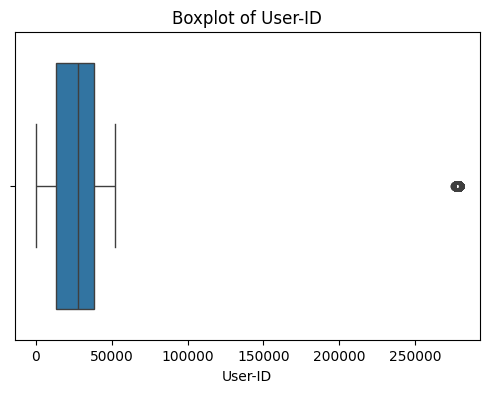

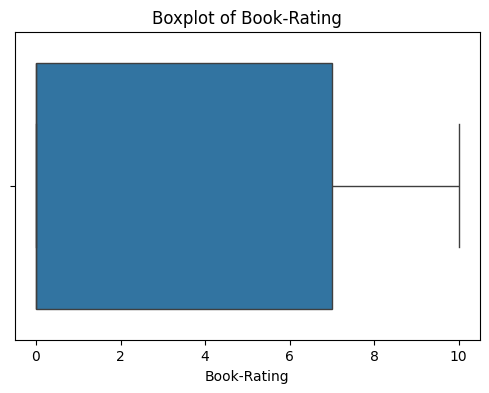

In [13]:
def plot_boxplots(df, num_cols=None):
    if num_cols is None:
        num_cols = df.select_dtypes(include=np.number).columns
    for col in num_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
plot_boxplots(ratings_df)

In [14]:
def summary_stats(df):
    print("\n📊 Numerical Summary:\n", df.describe())
    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols):
        print("\n📦 Categorical Summary:")
        for col in cat_cols:
            print(f"\n{col}:\n{df[col].value_counts()}")

summary_stats(ratings_df)


📊 Numerical Summary:
              User-ID    Book-Rating
count  221153.000000  221149.000000
mean    36774.050847       3.008320
std     53074.726868       3.872109
min         2.000000       0.000000
25%     13273.000000       0.000000
50%     27617.000000       0.000000
75%     37989.000000       7.000000
max    278854.000000      10.000000

📦 Categorical Summary:

ISBN:
ISBN
0971880107    465
0316666343    256
0385504209    171
0060928336    158
0312195516    151
             ... 
0395286654      1
0395247586      1
0394755588      1
0394727002      1
0396084052      1
Name: count, Length: 114843, dtype: int64


In [15]:
ratings_df.describe()

,User-ID,Book-Rating
count,221153.000000,221149.000000
mean,36774.050847,3.008320
std,53074.726868,3.872109
min,2.000000,0.000000
25%,13273.000000,0.000000
50%,27617.000000,0.000000
75%,37989.000000,7.000000
max,278854.000000,10.000000


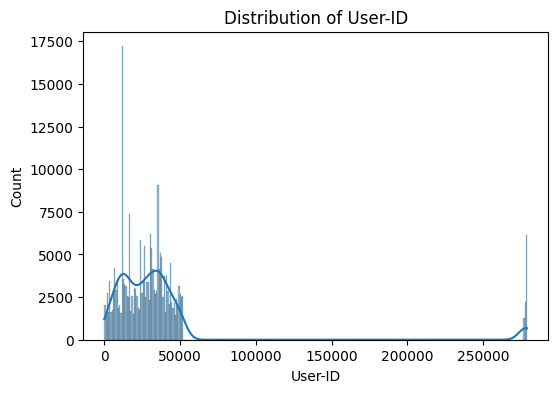

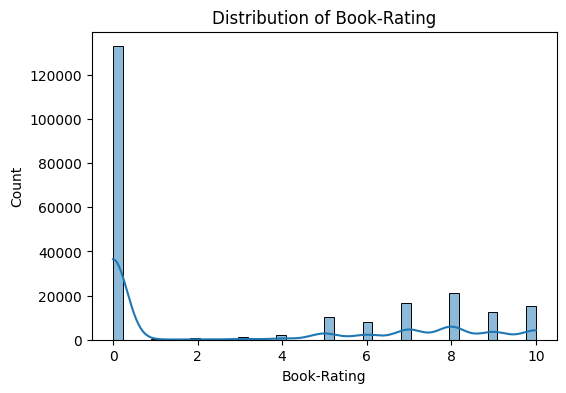

In [16]:
def plot_distributions(df, num_cols=None):
    if num_cols is None:
        num_cols = df.select_dtypes(include=np.number).columns
    for col in num_cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
plot_distributions(ratings_df)

### **2.3 Data Insights and Feature Engineering**

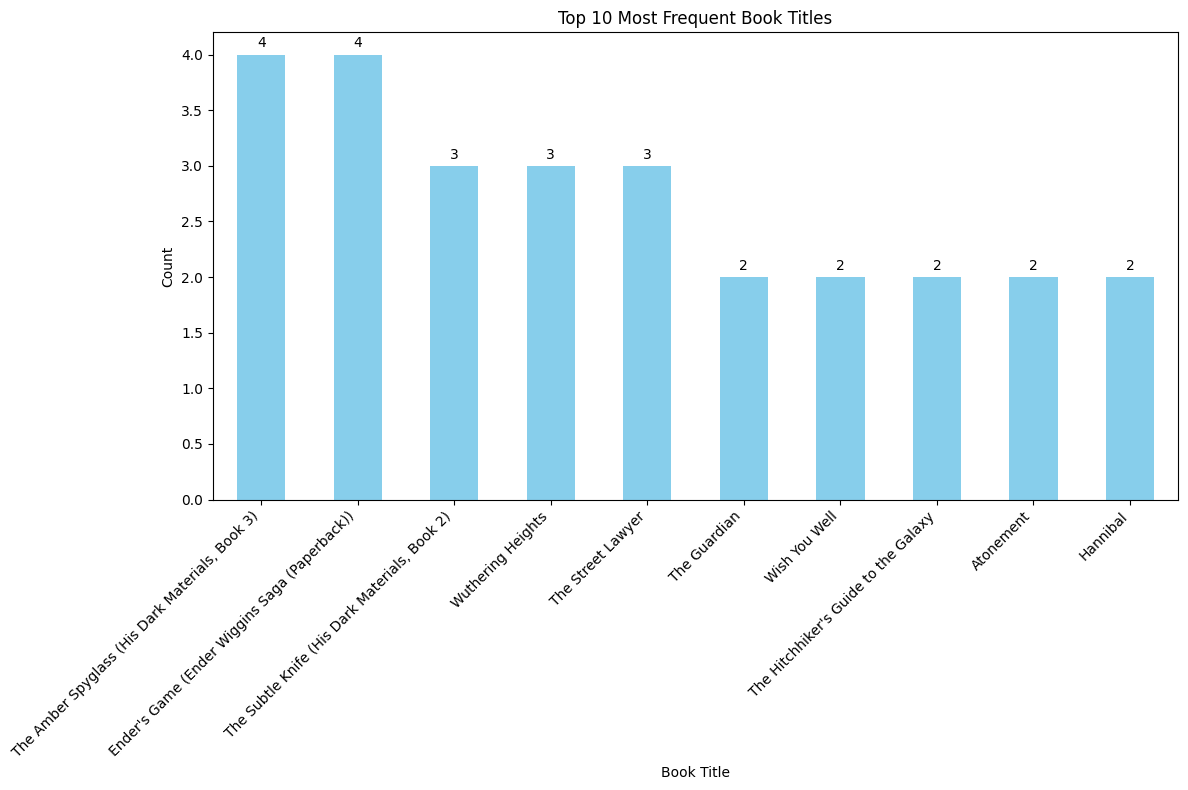

In [17]:
# Calculate the top 10 most common book titles
top_books = books_df['Book-Title'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(12, 8))
ax = top_books.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Book Titles')
plt.xlabel('Book Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

In [18]:
def outlier_zscore(df, threshold=3):
    from scipy.stats import zscore
    num_df = df.select_dtypes(include=np.number)
    z = np.abs(zscore(num_df))
    outliers = (z > threshold).sum()
    print(f"🚨 Outliers by Z-score > {threshold}:\\n{pd.Series(outliers, index=num_df.columns)}")

outlier_zscore(users_df)

🚨 Outliers by Z-score > 3:\nUser-ID    0
Age        0
dtype: int64


In [19]:
#Changing the data type
users_df['Location']= users_df['Location'].astype(str)

#split the column "Location"
users_df[['City', 'State', 'Country']] = users_df['Location'].str.split(',', n=2, expand=True)
# Clean up whitespace
users_df['City'] = users_df['City'].str.strip()
users_df['State'] = users_df['State'].str.strip()
users_df['Country'] = users_df['Country'].str.strip()


In [20]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81405 entries, 0 to 81404
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   81405 non-null  int64  
 1   Location  81405 non-null  object 
 2   Age       49144 non-null  float64
 3   City      81405 non-null  object 
 4   State     81343 non-null  object 
 5   Country   80439 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.7+ MB


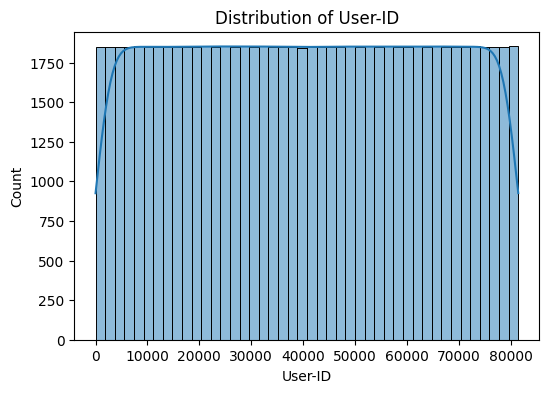

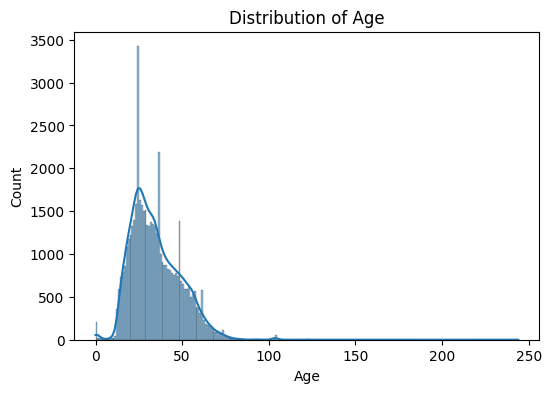

In [21]:
def plot_distributions(df, num_cols=None):
    if num_cols is None:
        num_cols = df.select_dtypes(include=np.number).columns
    for col in num_cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
plot_distributions(users_df)

In [22]:
def outlier_zscore(df, threshold=3):
    from scipy.stats import zscore
    numeric_df = df.select_dtypes(include=np.number)
    z_scores = np.abs(zscore(numeric_df))
    outliers = (z_scores > threshold).sum()
    print("\n🚨 Outliers per column (Z-score > {}):\n".format(threshold))
    print(pd.Series(outliers, index=numeric_df.columns))

outlier_zscore(users_df)


🚨 Outliers per column (Z-score > 3):

User-ID    0
Age        0
dtype: int64


<ipython-input-23-fea887e05014>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df_clean['Age'].fillna(median_age, inplace=True)


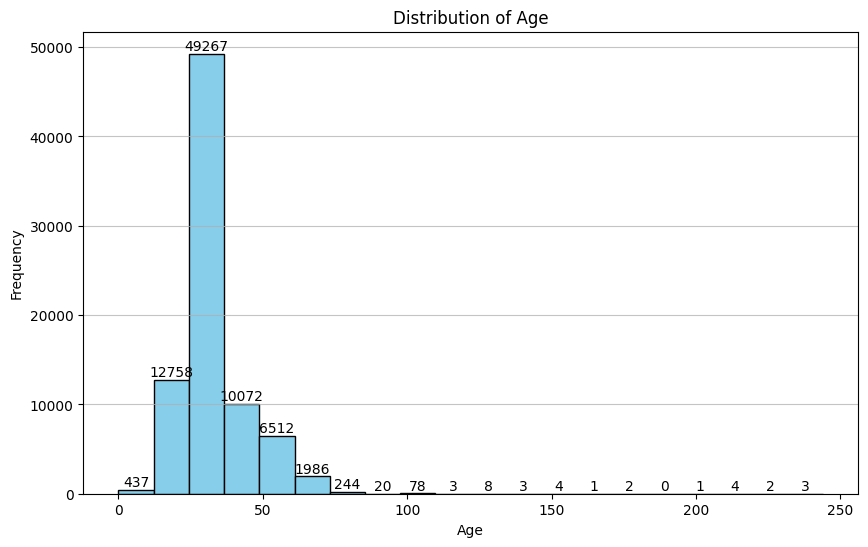

In [23]:
# Step 1: Handle missing values in the 'Age' column
#Fill missing 'Age' values with the median age
median_age = users_df['Age'].median()
users_df_clean = users_df.copy()
users_df_clean['Age'].fillna(median_age, inplace=True)

# Step 2: Convert 'Age' to integer type after handling missing values
users_df_clean['Age'] = users_df_clean['Age'].astype(int)

#Ploting Bar Chart
plt.figure(figsize=(10, 6))

# Plot the histogram and capture the returned values
n, bins, patches = plt.hist(users_df_clean['Age'], bins=20, color='skyblue', edgecolor='black')

# Set titles and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Add value labels on top of each bar
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2,
             patches[i].get_height(),
             f'{int(n[i])}',
             ha='center',
             va='bottom')

plt.show()


In [24]:
users_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81405 entries, 0 to 81404
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User-ID   81405 non-null  int64 
 1   Location  81405 non-null  object
 2   Age       81405 non-null  int64 
 3   City      81405 non-null  object
 4   State     81343 non-null  object
 5   Country   80439 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.7+ MB


In [25]:
users_df_clean.drop(columns='Location',inplace=True)

In [26]:
users_df_clean

,User-ID,Age,City,State,Country
0,1,32,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,32,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,32,farnborough,hants,united kingdom
...,...,...,...,...,...
81400,81461,12,pottsville,pennsylvania,usa
81401,81462,32,socorro,,
81402,81463,32,new york,n/a,usa
81403,81464,32,grimsby,england,united kingdom


In [27]:
users_df_clean = users_df.apply(lambda col: col.str.title() if col.dtype == 'object' else col)

In [28]:
users_df_clean.head()

,User-ID,Location,Age,City,State,Country
0,1,"Nyc, New York, Usa",NaN,Nyc,New York,Usa
1,2,"Stockton, California, Usa",18.0,Stockton,California,Usa
2,3,"Moscow, Yukon Territory, Russia",NaN,Moscow,Yukon Territory,Russia
3,4,"Porto, V.N.Gaia, Portugal",17.0,Porto,V.N.Gaia,Portugal
4,5,"Farnborough, Hants, United Kingdom",NaN,Farnborough,Hants,United Kingdom


In [29]:
users_df_clean['Country'] = users_df_clean['Country'].replace('Usa', 'USA')

In [30]:
users_df_clean

,User-ID,Location,Age,City,State,Country
0,1,"Nyc, New York, Usa",NaN,Nyc,New York,USA
1,2,"Stockton, California, Usa",18.0,Stockton,California,USA
2,3,"Moscow, Yukon Territory, Russia",NaN,Moscow,Yukon Territory,Russia
3,4,"Porto, V.N.Gaia, Portugal",17.0,Porto,V.N.Gaia,Portugal
4,5,"Farnborough, Hants, United Kingdom",NaN,Farnborough,Hants,United Kingdom
...,...,...,...,...,...,...
81400,81461,"Pottsville, Pennsylvania, Usa",12.0,Pottsville,Pennsylvania,USA
81401,81462,"Socorro, ,",NaN,Socorro,,
81402,81463,"New York, N/A, Usa",NaN,New York,N/A,USA
81403,81464,"Grimsby, England, United Kingdom",NaN,Grimsby,England,United Kingdom


In [31]:
users_df_clean.isnull().sum()

,0
User-ID,0
Location,0
Age,32261
City,0
State,62
Country,966


In [32]:
def outlier_zscore(df, threshold=3):
    from scipy.stats import zscore
    num_df = df.select_dtypes(include=np.number)
    z = np.abs(zscore(num_df))
    outliers = (z > threshold).sum()
    print(f"🚨 Outliers by Z-score > {threshold}:\\n{pd.Series(outliers, index=num_df.columns)}")
outlier_zscore(users_df,threshold=3)

🚨 Outliers by Z-score > 3:\nUser-ID    0
Age        0
dtype: int64


In [33]:
users_df_clean

,User-ID,Location,Age,City,State,Country
0,1,"Nyc, New York, Usa",NaN,Nyc,New York,USA
1,2,"Stockton, California, Usa",18.0,Stockton,California,USA
2,3,"Moscow, Yukon Territory, Russia",NaN,Moscow,Yukon Territory,Russia
3,4,"Porto, V.N.Gaia, Portugal",17.0,Porto,V.N.Gaia,Portugal
4,5,"Farnborough, Hants, United Kingdom",NaN,Farnborough,Hants,United Kingdom
...,...,...,...,...,...,...
81400,81461,"Pottsville, Pennsylvania, Usa",12.0,Pottsville,Pennsylvania,USA
81401,81462,"Socorro, ,",NaN,Socorro,,
81402,81463,"New York, N/A, Usa",NaN,New York,N/A,USA
81403,81464,"Grimsby, England, United Kingdom",NaN,Grimsby,England,United Kingdom


In [34]:
# Step 1: Handle missing values in the 'Age' column
#Fill missing 'Age' values with the median age
median_age = users_df_clean['Age'].median()
users_df_clean_new = users_df_clean.copy()
users_df_clean['Age'].fillna(median_age, inplace=True)

# Step 2: Convert 'Age' to integer type after handling missing values
users_df_clean['Age'] = users_df_clean['Age'].astype(int)

<ipython-input-34-cc208ddad601>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df_clean['Age'].fillna(median_age, inplace=True)


In [35]:
# Fill missing 'State' values with the most frequent state
users_df_clean['State'].fillna(users_df_clean['State'].mode()[0], inplace=True)

# Fill missing 'Country' values with the most frequent country
users_df_clean['Country'].fillna(users_df_clean['Country'].mode()[0], inplace=True)

<ipython-input-35-606904757559>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df_clean['State'].fillna(users_df_clean['State'].mode()[0], inplace=True)
<ipython-input-35-606904757559>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [36]:
users_df_clean.isnull().sum()

,0
User-ID,0
Location,0
Age,0
City,0
State,0
Country,0


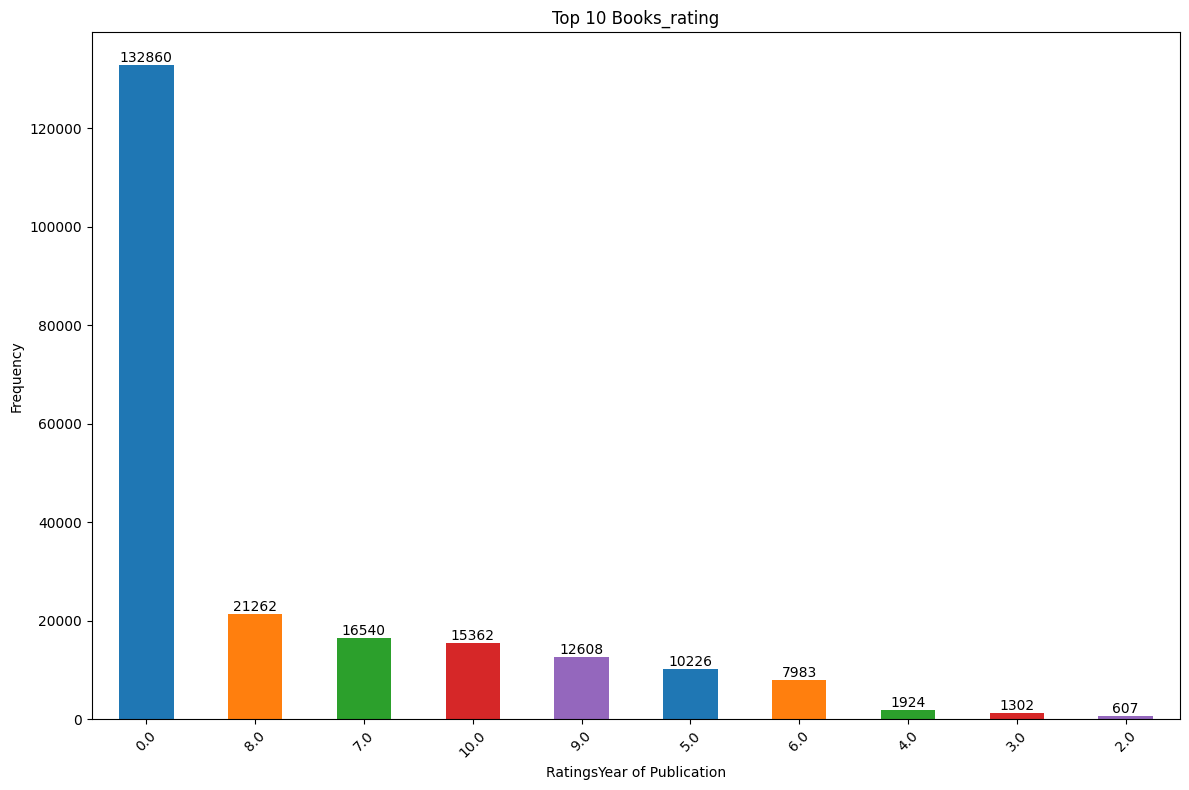

Book-Rating
0.0     132860
8.0      21262
7.0      16540
10.0     15362
9.0      12608
5.0      10226
6.0       7983
4.0       1924
3.0       1302
2.0        607
Name: count, dtype: int64


In [37]:
top_10=ratings_df['Book-Rating'].value_counts().nlargest(10)

# Step: Plot the data
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.figure(figsize=(12, 8))
ax = top_10.plot(kind='bar', color=colors)
plt.title('Top 10 Books_rating')
plt.xlabel('RatingsYear of Publication')
plt.ylabel('Frequency')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(top_10)

In [38]:
print("Missing values per column before handling:")
print(ratings_df.isnull().sum())

Missing values per column before handling:
User-ID        0
ISBN           0
Book-Rating    4
dtype: int64


In [39]:
# Fill missing values using SimpleImputer with mean strategy
from sklearn.impute import SimpleImputer

#Create a copy to preserve the original Dataframe
ratings_df_clean = ratings_df.copy()

#Initialize the SimplerImputer with mean strategy for numeric columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# for learning, if categorical data, strategy='most_frequent'

#Apply imputer on the "Booking-Rating" column
ratings_df_clean[['Book-Rating']] = imputer.fit_transform(ratings_df_clean[['Book-Rating']])

print("\nAfter SimpleImputer mean strategy on 'Book-Rating':")
print(ratings_df_clean.isnull().sum())


After SimpleImputer mean strategy on 'Book-Rating':
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [40]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221153 entries, 0 to 221152
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      221153 non-null  int64  
 1   ISBN         221153 non-null  object 
 2   Book-Rating  221149 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ MB


In [41]:
#Check for duplicates: df.duplicated().sum()
books_df.duplicated().sum()

np.int64(0)

In [42]:
# Check Unique and most common publishers from Books_DF
books_df['Book-Author'].unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'Webb Garrison', 'MEGAN MCCAFFERTY', 'Jill Davis'], dtype=object)

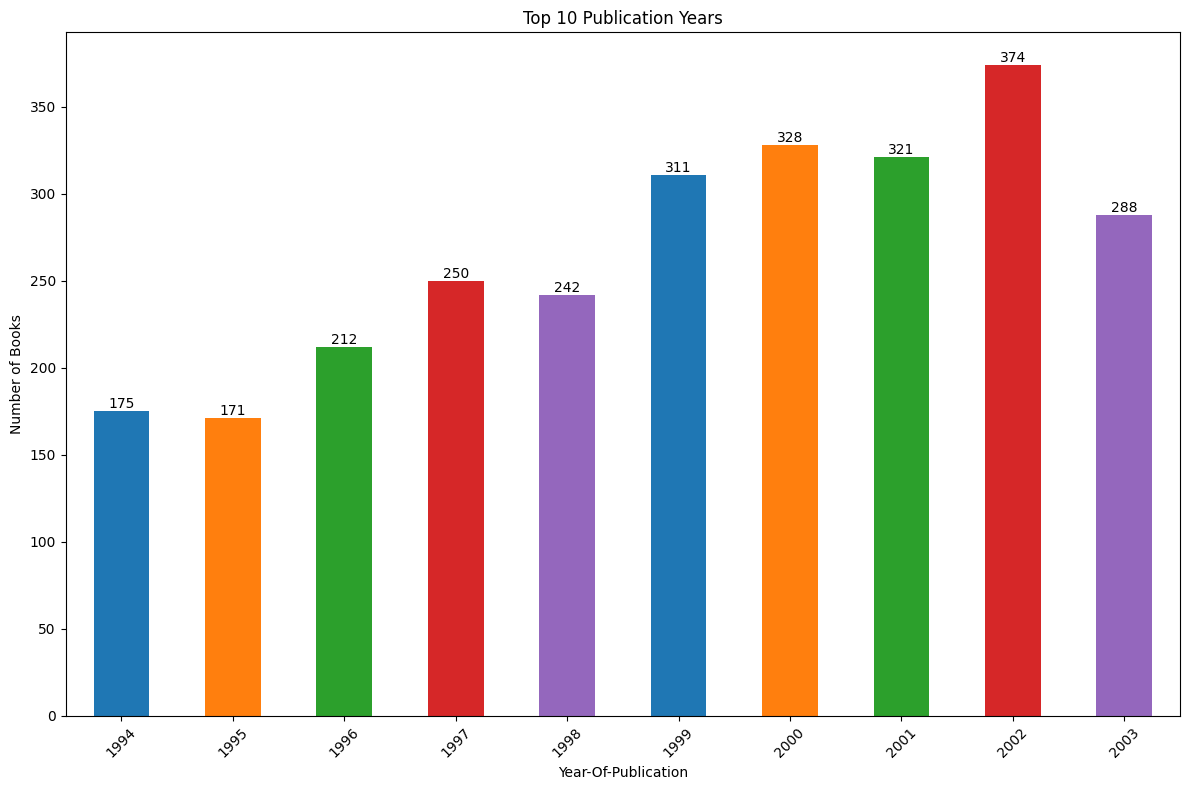

In [43]:
# Step 1: Convert 'Year-Of-Publication' to float
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

# Step 2: Drop rows with NaN values in 'Year-Of-Publication'
books_df = books_df.dropna(subset=['Year-Of-Publication'])

# Step 3: Convert 'Year-Of-Publication' to integer
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

# Step 4: Calculate the top 20 publication years
top_years = books_df['Year-Of-Publication'].value_counts().nlargest(10).sort_index()

# Step 5: Plot the data
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.figure(figsize=(12, 8))
plt.title('Top 10 Publication Years')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')

ax = top_years.plot(kind='bar', color=colors)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
ratings_df.groupby('User-ID')['Book-Rating'].count().describe()


,Book-Rating
count,20427.000000
mean,10.826308
std,123.059850
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,13601.000000


In [45]:
#Combines all three datasets - ratings_df and books_df using ISNN and later combines with users_df using User-ID.
merged_df = ratings_df.merge(books_df, on='ISBN').merge(users_df_clean, on='User-ID')

In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30253 entries, 0 to 30252
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              30253 non-null  int64  
 1   ISBN                 30253 non-null  object 
 2   Book-Rating          30253 non-null  float64
 3   Book-Title           30253 non-null  object 
 4   Book-Author          30253 non-null  object 
 5   Year-Of-Publication  30253 non-null  int64  
 6   Publisher            30253 non-null  object 
 7   Image-URL-S          30253 non-null  object 
 8   Image-URL-M          30253 non-null  object 
 9   Image-URL-L          30253 non-null  object 
 10  Location             30253 non-null  object 
 11  Age                  30253 non-null  int64  
 12  City                 30253 non-null  object 
 13  State                30253 non-null  object 
 14  Country              30253 non-null  object 
dtypes: float64(1), int64(3), object(11)


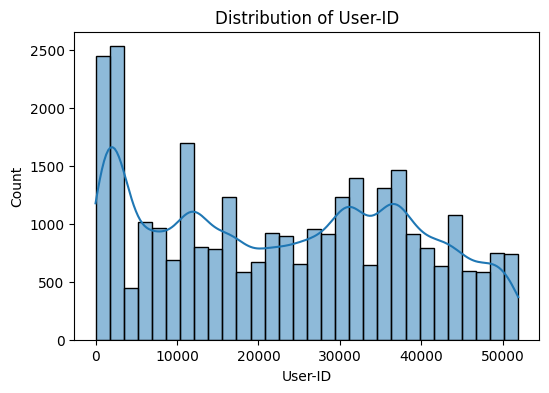

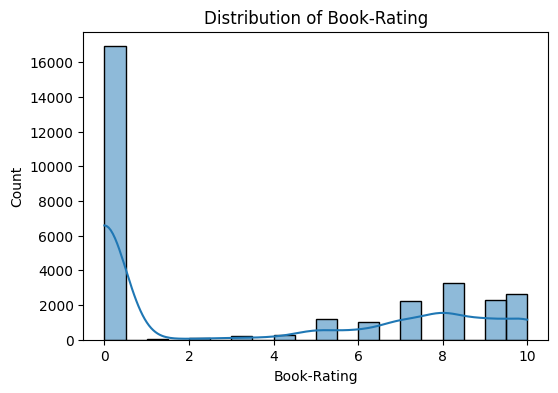

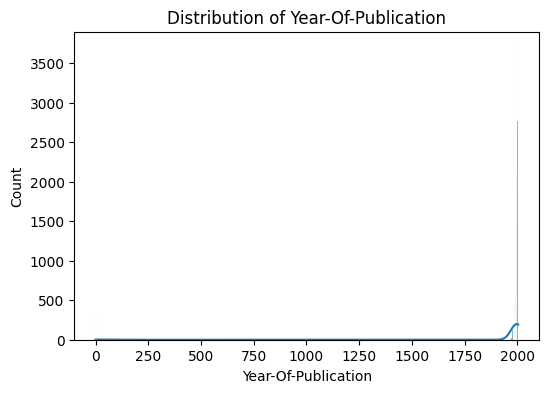

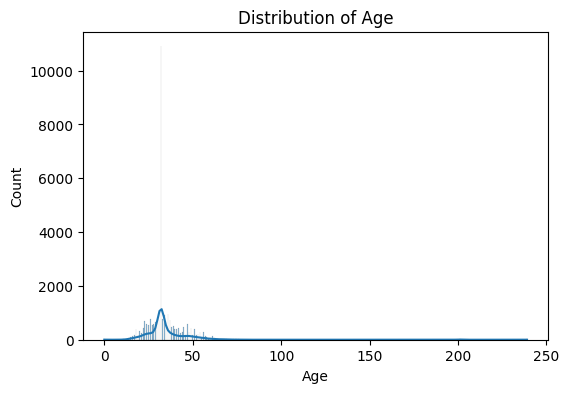

In [47]:
def plot_distributions(df, num_cols=None):
    if num_cols is None:
        num_cols = df.select_dtypes(include=np.number).columns
    for col in num_cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
plot_distributions(merged_df)

In [48]:
#Check for duplicates: df.duplicated().sum()
merged_df.duplicated().sum()

np.int64(0)

In [49]:
merged_df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [50]:
books_df['Book-Author'].value_counts().sort_index()

,count
Book-Author,
A'Lelia Bundles,1
A. A. Milne,1
A. C. Bhaktivedanta Swami Prabhupada,2
A. C. Crispin,2
A. C. Gordon,1
...,...
ZZ Packer,1
Zadie Smith,2
Zora Neale Hurston,1


In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30253 entries, 0 to 30252
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              30253 non-null  int64  
 1   ISBN                 30253 non-null  object 
 2   Book-Rating          30253 non-null  float64
 3   Book-Title           30253 non-null  object 
 4   Book-Author          30253 non-null  object 
 5   Year-Of-Publication  30253 non-null  int64  
 6   Publisher            30253 non-null  object 
 7   Image-URL-S          30253 non-null  object 
 8   Image-URL-M          30253 non-null  object 
 9   Image-URL-L          30253 non-null  object 
 10  Location             30253 non-null  object 
 11  Age                  30253 non-null  int64  
 12  City                 30253 non-null  object 
 13  State                30253 non-null  object 
 14  Country              30253 non-null  object 
dtypes: float64(1), int64(3), object(11)


In [52]:
merged_df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [53]:
# Convert and clean numeric columns

# Convert 'Age' column to numeric and handle errors
merged_df['Age'] = pd.to_numeric(merged_df['Age'], errors='coerce')

# Filter out unrealistic ages (e.g., <5 or >100)
merged_df = merged_df[(merged_df['Age'] >= 5) & (merged_df['Age'] <= 100)]

# Convert 'Year-Of-Publication' to numeric, set errors to NaN
merged_df['Year-Of-Publication'] = pd.to_numeric(merged_df['Year-Of-Publication'], errors='coerce')

# Filter years to valid range (e.g., 1995–2025)
merged_df = merged_df[
    (merged_df['Year-Of-Publication'] >= 1995) &
    (merged_df['Year-Of-Publication'] <= 2025)
]

<ipython-input-53-4d2fdf901942>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Year-Of-Publication'] = pd.to_numeric(merged_df['Year-Of-Publication'], errors='coerce')


In [54]:
initial_rows = len(merged_df)
# ...cleaning steps...
final_rows = len(merged_df)
print(f"Rows dropped during cleanup: {initial_rows - final_rows}")

Rows dropped during cleanup: 0


In [55]:
# EDA on missing values (NaN analysis)
nan_summary = merged_df.isnull().sum()
nan_percentage = (nan_summary / len(merged_df)) * 100

In [56]:
print(nan_summary, nan_percentage)

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Location               0
Age                    0
City                   0
State                  0
Country                0
dtype: int64 User-ID                0.0
ISBN                   0.0
Book-Rating            0.0
Book-Title             0.0
Book-Author            0.0
Year-Of-Publication    0.0
Publisher              0.0
Image-URL-S            0.0
Image-URL-M            0.0
Image-URL-L            0.0
Location               0.0
Age                    0.0
City                   0.0
State                  0.0
Country                0.0
dtype: float64


In [57]:
#EDA script on merged dataset

eda_results = {
    "Shape": merged_df.shape,
    "Column Types": merged_df.dtypes,
    "Missing Values": merged_df.isnull().sum(),
    "Rating Distribution": merged_df['Book-Rating'].value_counts().sort_index(),
    "Rating Stats": merged_df['Book-Rating'].describe(),
    "Top Rated Books (by count)": merged_df['Book-Title'].value_counts().head(10),
    "Average Rating per Book (Top 10)": merged_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(10),
    "Publication Year Distribution": merged_df['Year-Of-Publication'].value_counts().sort_index().head(10),
    "Unique Users": merged_df['User-ID'].nunique(),
    "User Age Stats": merged_df['Age'].describe(),
    "Top Countries": merged_df['Country'].value_counts().head(10),
    "Ratings per User": merged_df.groupby('User-ID')['Book-Rating'].count().describe(),
    "Ratings per Book": merged_df.groupby('ISBN')['Book-Rating'].count().describe()
}


In [58]:
eda_results

{'Shape': (21740, 15),
 'Column Types': User-ID                  int64
 ISBN                    object
 Book-Rating            float64
 Book-Title              object
 Book-Author             object
 Year-Of-Publication      int64
 Publisher               object
 Image-URL-S             object
 Image-URL-M             object
 Image-URL-L             object
 Location                object
 Age                      int64
 City                    object
 State                   object
 Country                 object
 dtype: object,
 'Missing Values': User-ID                0
 ISBN                   0
 Book-Rating            0
 Book-Title             0
 Book-Author            0
 Year-Of-Publication    0
 Publisher              0
 Image-URL-S            0
 Image-URL-M            0
 Image-URL-L            0
 Location               0
 Age                    0
 City                   0
 State                  0
 Country                0
 dtype: int64,
 'Rating Distribution': Book-Rating
 0.0  

In [59]:
merged_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,City,State,Country
0,2,0195153448,0.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,"Stockton, California, Usa",18,Stockton,California,USA
1,8,0002005018,5.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"Timmins, Ontario, Canada",32,Timmins,Ontario,Canada
3,8,0374157065,0.0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,"Timmins, Ontario, Canada",32,Timmins,Ontario,Canada
4,8,0393045218,0.0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,"Timmins, Ontario, Canada",32,Timmins,Ontario,Canada
6,8,0425176428,0.0,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,"Timmins, Ontario, Canada",32,Timmins,Ontario,Canada


In [60]:
merged_df.to_csv('C://Users//dkdey//OneDrive - UNICEF//ECARO//03 Data Science Applications//Python Learning//merged_df.csv', index=False)

In [61]:
merged_df.describe(include='all')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,City,State,Country
count,21740.000000,21740,21740.000000,21740,21740,21740.000000,21740,21740,21740,21740,21740,21740.000000,21740,21740,21740
unique,NaN,2573,NaN,2499,1793,NaN,682,2573,2573,2573,3156,NaN,2604,361,77
top,NaN,0971880107,NaN,Wild Animus,John Grisham,NaN,Ballantine Books,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"N/A, N/A, N/A",NaN,N/A,California,USA
freq,NaN,449,NaN,449,493,NaN,1199,449,449,449,747,NaN,785,2538,16350
mean,23596.621205,NaN,3.409706,NaN,NaN,1999.796872,NaN,NaN,NaN,NaN,NaN,34.754968,NaN,NaN,NaN
std,15386.226633,NaN,4.011218,NaN,NaN,2.551868,NaN,NaN,NaN,NaN,NaN,9.678995,NaN,NaN,NaN
min,2.000000,NaN,0.000000,NaN,NaN,1995.000000,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN
25%,9856.000000,NaN,0.000000,NaN,NaN,1998.000000,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,NaN,NaN
50%,23902.000000,NaN,0.000000,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,NaN,NaN
75%,36606.000000,NaN,8.000000,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,NaN


In [62]:
# Strategy:
# - Fill numeric columns with their median
# - Fill categorical columns with their mode (most frequent value)

for column in books_df.columns:
    if merged_df[column].dtype in ['float64', 'int64']:
        # Replace NaN in numeric columns with median
        merged_df[column].fillna(books_df[column].median(), inplace=True)
    else:
        # Replace NaN in object (string) columns with mode
        if merged_df[column].mode().empty:
            merged_df[column].fillna('Unknown', inplace=True)
        else:
            merged_df[column].fillna(books_df[column].mode()[0], inplace=True)


<ipython-input-62-2a28b68bad52>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[column].fillna(books_df[column].mode()[0], inplace=True)
<ipython-input-62-2a28b68bad52>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [63]:
#Sparsity
num_users = merged_df['User-ID'].nunique()
num_books = merged_df['ISBN'].nunique()
num_ratings = len(merged_df)
sparsity = 1 - (num_ratings / (num_users * num_books))
print(f"\nDataset Sparsity: {sparsity:.4f}")



Dataset Sparsity: 0.9985


In [64]:
#Interpretations
#sparsity = 0.96 → 96% of merged_df combinations are missing (not rated)
#Lower sparsity means more data, which generally improves model performance.

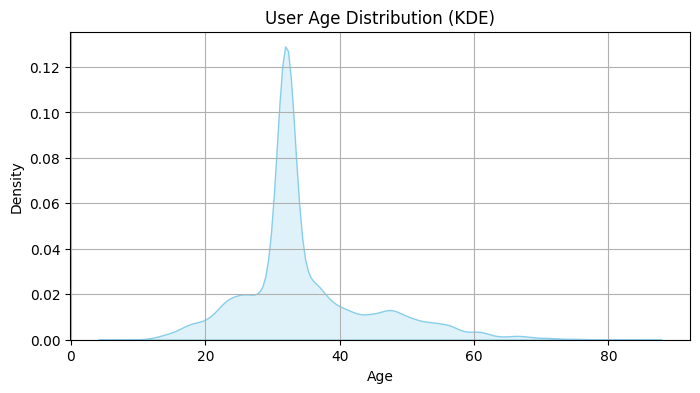

In [65]:
# KDE Plot for Age Distribution
plt.figure(figsize=(8, 4))
sns.kdeplot(data=merged_df, x='Age', fill=True, color='skyblue', bw_adjust=1)
plt.title("User Age Distribution (KDE)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.grid(True)
plt.show()

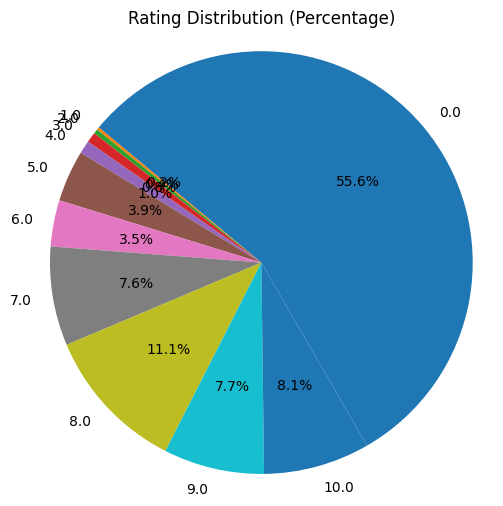

In [66]:
rating_counts = merged_df['Book-Rating'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=300)
plt.title("Rating Distribution (Percentage)")
plt.axis('equal')
plt.show()

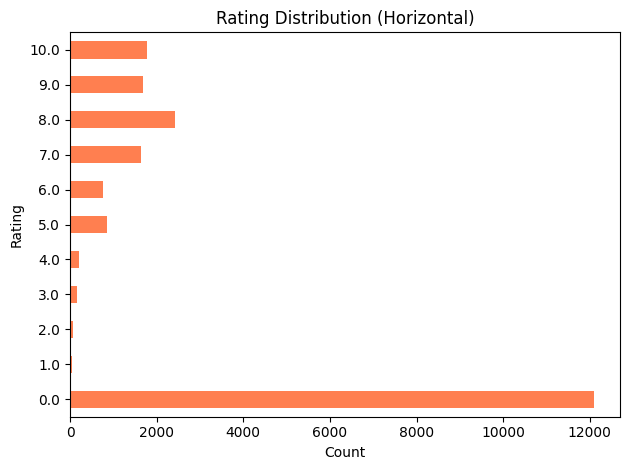

In [67]:
merged_df['Book-Rating'].value_counts().sort_index().plot(kind='barh', color='coral')

plt.title("Rating Distribution (Horizontal)")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

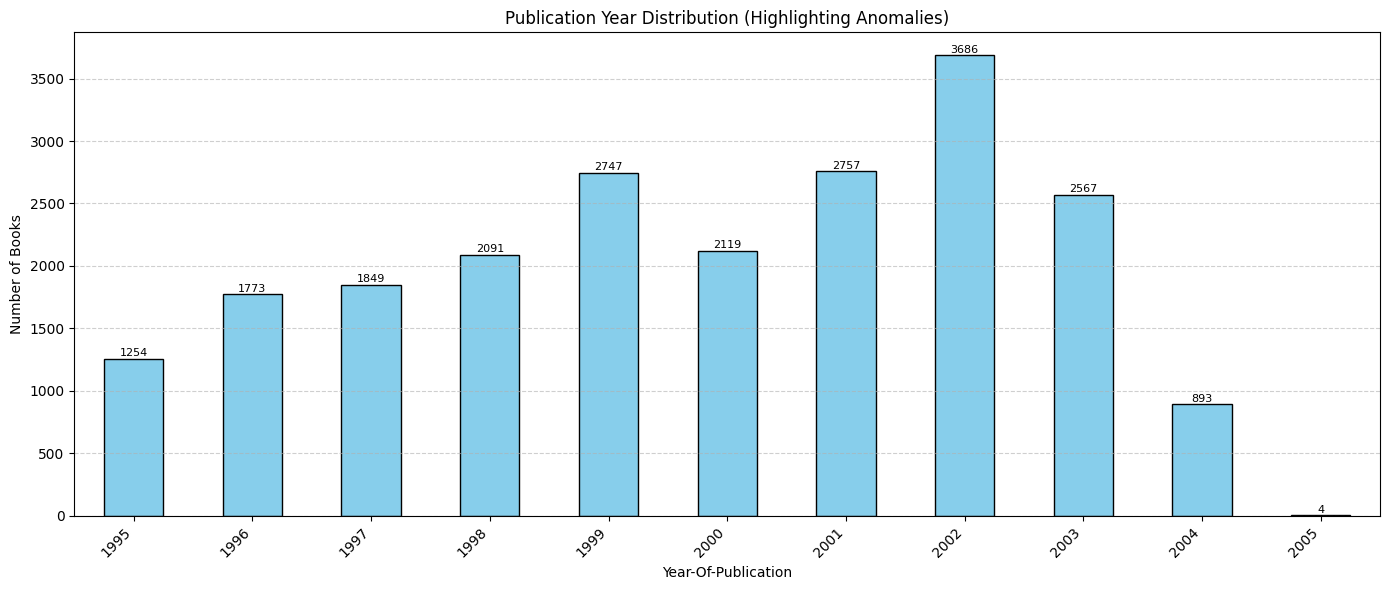

In [68]:
############ Identify anomalies ###########

# Convert to numeric and drop NaNs
merged_df['Year-Of-Publication'] = pd.to_numeric(merged_df['Year-Of-Publication'], errors='coerce')
merged_df = merged_df.dropna(subset=['Year-Of-Publication'])

# Round year to integer
merged_df['Year-Of-Publication'] = merged_df['Year-Of-Publication'].astype(int)

# Count publications by year
highlight_years = merged_df['Year-Of-Publication'].value_counts().nlargest(11).sort_index()

# Plot setup
plt.figure(figsize=(14, 6))
colors = ['red' if (y < 1900 or y > 2025) else 'skyblue' for y in highlight_years.index]

# Bar chart
plt.title("Publication Year Distribution (Highlighting Anomalies)")
plt.xlabel("Year")
plt.ylabel("Number of Books")

ax = highlight_years.plot(kind='bar', color=colors, edgecolor='black')

# Round off year ticks on x-axis
tick_positions = list(range(0, len(highlight_years), max(1, len(highlight_years)//20)))
tick_labels = [str(int(highlight_years.index[i])) for i in tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 5,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

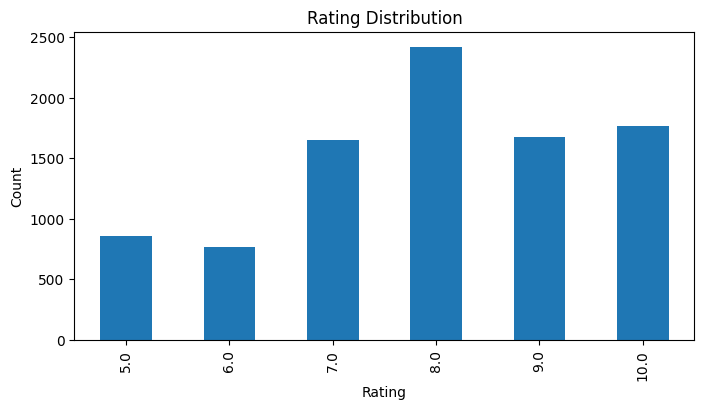

In [69]:
# 5. Rating Analysis
plt.figure(figsize=(8, 4))
merged_df['Book-Rating'].value_counts().sort_index().tail(6).plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

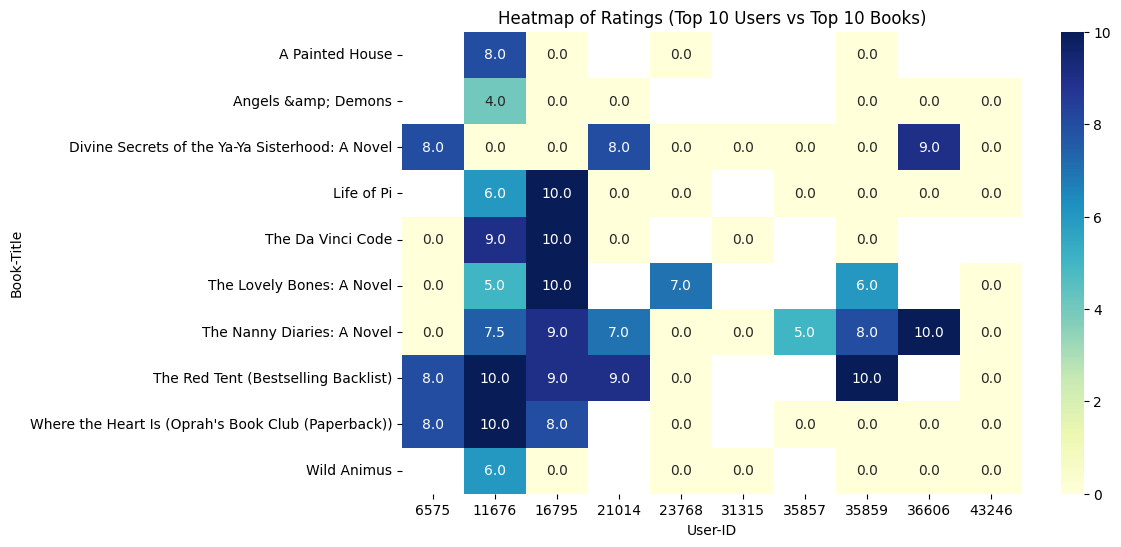

In [70]:
# Heatmap of average rating by top users and books
top_users = merged_df['User-ID'].value_counts().head(10).index
top_books = merged_df['Book-Title'].value_counts().head(10).index
heatmap_data = merged_df[(merged_df['User-ID'].isin(top_users)) & (merged_df['Book-Title'].isin(top_books))]
heatmap_matrix = heatmap_data.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_matrix, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Heatmap of Ratings (Top 10 Users vs Top 10 Books)")
plt.show()

In [71]:
# Top rated books (with >=7 ratings)
top_books = merged_df.groupby('Book-Title').filter(lambda x: len(x) >= 7)
print("\nTop Rated Books (with >=7 ratings):")
print(top_books.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(10))


Top Rated Books (with >=7 ratings):
Book-Title
Free                                                                          8.500000
The Demon-Haunted World: Science As a Candle in the Dark                      8.285714
Queen of the Darkness (Black Jewels Trilogy)                                  8.142857
The Snow Leopard (Penguin Nature Classics)                                    7.142857
Harry Potter and the Sorcerer's Stone (Book 1)                                6.966667
Veronika Decides to Die                                                       6.875000
Arranged Marriage: Stories                                                    6.857143
The Westing Game (Now in Speak!)                                              6.750000
The Hobbit: or There and Back Again                                           6.733333
The Curious Incident of the Dog in the Night-Time (Vintage Contemporaries)    6.684211
Name: Book-Rating, dtype: float64


In [72]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21740 entries, 0 to 30252
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              21740 non-null  int64  
 1   ISBN                 21740 non-null  object 
 2   Book-Rating          21740 non-null  float64
 3   Book-Title           21740 non-null  object 
 4   Book-Author          21740 non-null  object 
 5   Year-Of-Publication  21740 non-null  int64  
 6   Publisher            21740 non-null  object 
 7   Image-URL-S          21740 non-null  object 
 8   Image-URL-M          21740 non-null  object 
 9   Image-URL-L          21740 non-null  object 
 10  Location             21740 non-null  object 
 11  Age                  21740 non-null  int64  
 12  City                 21740 non-null  object 
 13  State                21740 non-null  object 
 14  Country              21740 non-null  object 
dtypes: float64(1), int64(3), object(11)
memor

In [73]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21740 entries, 0 to 30252
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              21740 non-null  int64  
 1   ISBN                 21740 non-null  object 
 2   Book-Rating          21740 non-null  float64
 3   Book-Title           21740 non-null  object 
 4   Book-Author          21740 non-null  object 
 5   Year-Of-Publication  21740 non-null  int64  
 6   Publisher            21740 non-null  object 
 7   Image-URL-S          21740 non-null  object 
 8   Image-URL-M          21740 non-null  object 
 9   Image-URL-L          21740 non-null  object 
 10  Location             21740 non-null  object 
 11  Age                  21740 non-null  int64  
 12  City                 21740 non-null  object 
 13  State                21740 non-null  object 
 14  Country              21740 non-null  object 
dtypes: float64(1), int64(3), object(11)
memor

In [74]:
#Reducing Sparcity by filtering

In [75]:
user_counts = merged_df['User-ID'].value_counts()
active_users = user_counts[user_counts >= 10].index
sparse_filtered_df = merged_df[merged_df['User-ID'].isin(active_users)]

book_counts = sparse_filtered_df['ISBN'].value_counts()
popular_books = book_counts[book_counts >= 10].index
sparse_filtered_df = sparse_filtered_df[sparse_filtered_df['ISBN'].isin(popular_books)]

In [76]:
#Re-run Sparsity

num_users = merged_df['User-ID'].nunique()
num_books = merged_df['ISBN'].nunique()
num_ratings = len(merged_df)
sparsity = 1 - (num_ratings / (num_users * num_books))
print(f"\nDataset Sparsity: {sparsity:.4f}")



Dataset Sparsity: 0.9985


In [77]:
print("Original shape:", merged_df.shape)
print("Filtered shape:", sparse_filtered_df.shape)

Original shape: (21740, 15)
Filtered shape: (7140, 15)


## Recommendation System - Model_Building
### This model is based on "Collaborative filtering" using Cosine_Similarity, which measures the angle b/w "User-ratings" vectors of items(books).

In [ ]:
## Clarity on steps
### DataFrame and Data processing,
### Split data for training and testing, Training the model,make recommendations and
### Evaluate the model.

In [78]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

### 1. Item-based Book Recommendations

In [79]:
print(sparse_filtered_df['User-ID'].isnull().sum())
print(sparse_filtered_df['Book-Title'].isnull().sum())
print("-------------------------------")
print(sparse_filtered_df.dtypes)
print("-------------------------------")
print(sparse_filtered_df.info())
print("-------------------------------")
sparse_filtered_df.head()


0
0
-------------------------------
User-ID                  int64
ISBN                    object
Book-Rating            float64
Book-Title              object
Book-Author             object
Year-Of-Publication      int64
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
Location                object
Age                      int64
City                    object
State                   object
Country                 object
dtype: object
-------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 7140 entries, 102 to 30251
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User-ID              7140 non-null   int64  
 1   ISBN                 7140 non-null   object 
 2   Book-Rating          7140 non-null   float64
 3   Book-Title           7140 non-null   object 
 4   Book-Author          7140 non-null   object

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,City,State,Country
102,99,0451166892,3.0,The Pillars of the Earth,Ken Follett,1996,Signet Book,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...,"Franktown, Colorado, Usa",42,Franktown,Colorado,USA
105,99,067976397X,0.0,Corelli's Mandolin : A Novel,LOUIS DE BERNIERES,1995,Vintage,http://images.amazon.com/images/P/067976397X.0...,http://images.amazon.com/images/P/067976397X.0...,http://images.amazon.com/images/P/067976397X.0...,"Franktown, Colorado, Usa",42,Franktown,Colorado,USA
107,99,0786868716,0.0,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,"Franktown, Colorado, Usa",42,Franktown,Colorado,USA
179,242,0971880107,0.0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"Neuffen, Baden-Wuerttemberg, Germany",37,Neuffen,Baden-Wuerttemberg,Germany
207,243,0060977493,7.0,The God of Small Things,Arundhati Roy,1998,Perennial,http://images.amazon.com/images/P/0060977493.0...,http://images.amazon.com/images/P/0060977493.0...,http://images.amazon.com/images/P/0060977493.0...,"Arden Hills, Minnesota, Usa",32,Arden Hills,Minnesota,USA


In [80]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

### Steps followed

In [81]:
# STEP 1: Clean and Filter Data

df = sparse_filtered_df[['User-ID', 'Book-Title', 'Book-Rating']].dropna()

# Ensure proper types
df['User-ID'] = pd.to_numeric(df['User-ID'], errors='coerce').astype(int)
df['Book-Rating'] = pd.to_numeric(df['Book-Rating'], errors='coerce')

# Filter active users and popular books
user_counts = df['User-ID'].value_counts()
book_counts = df['Book-Title'].value_counts()

active_users = user_counts[user_counts >= 20].index
popular_books = book_counts[book_counts >= 50].index

df_filtered = df[df['User-ID'].isin(active_users) & df['Book-Title'].isin(popular_books)]


In [82]:
# STEP 2: Train/Test Split Per User

def train_test_split_per_user(df, test_size=0.2):
    train_list, test_list = [], []
    for user_id, group in df.groupby('User-ID'):
        if len(group) < 5:
            train_list.append(group)
        else:
            train, test = train_test_split(group, test_size=test_size, random_state=42)
            train_list.append(train)
            test_list.append(test)
    return pd.concat(train_list), pd.concat(test_list)

train_df, test_df = train_test_split_per_user(df_filtered)

In [83]:
# STEP 3: Create User-Item Matrix from Training Set

train_grouped = train_df.groupby(['User-ID', 'Book-Title'], as_index=False)['Book-Rating'].mean()
train_matrix = train_grouped.pivot(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)



In [84]:
# STEP 4: Normalize Ratings by Subtracting User Mean

normalized_matrix = train_matrix.copy()
user_means = normalized_matrix.mean(axis=1)
normalized_matrix = normalized_matrix.sub(user_means, axis=0)


In [85]:
# STEP 5: Compute Book-Book Cosine Similarity

# Transpose to get books as rows
book_user_matrix = normalized_matrix.T

# Drop books with all zero ratings to prevent shape mismatch
book_user_matrix = book_user_matrix.loc[(book_user_matrix != 0).any(axis=1)]

# Cosine similarity
book_similarity = cosine_similarity(book_user_matrix)

book_similarity_df = pd.DataFrame(
    book_similarity,
    index=book_user_matrix.index,
    columns=book_user_matrix.index
)

In [86]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# STEP 6: Define the prediction function
def predict_rating(user_id, book_title, top_n=5):
    if book_title not in book_similarity_df or user_id not in normalized_matrix.index:
        return None

    similar_books = book_similarity_df[book_title].drop(book_title)
    user_ratings = normalized_matrix.loc[user_id]

    rated_books = user_ratings[user_ratings != 0].index.intersection(similar_books.index)
    if len(rated_books) == 0:
        return user_means[user_id]  # fallback

    similar_scores = similar_books[rated_books].sort_values(ascending=False).head(top_n)
    weighted_scores = (similar_scores * user_ratings[similar_scores.index]).sum()
    sum_of_similarities = similar_scores.sum()

    if sum_of_similarities == 0 or np.isnan(weighted_scores):
        return user_means[user_id]  # fallback

    return (weighted_scores / sum_of_similarities) + user_means[user_id]

# STEP 7: Evaluate predictions
test_df['predicted'] = test_df.apply(
    lambda row: predict_rating(row['User-ID'], row['Book-Title']),
    axis=1
)
test_df = test_df.dropna(subset=['predicted'])

# Compute metrics
mse = mean_squared_error(test_df['Book-Rating'], test_df['predicted'])
rmse = np.sqrt(mse)
#r2 = r2_score(test_df['Book-Rating'], test_df['predicted'])

# Print evaluation
print(f"📉 MSE on test set (normalized CF): {mse:.2f}")
print(f"📉 RMSE on test set (normalized CF): {rmse:.2f}")
#print(f"📈 R² score on test set (normalized CF): {r2:.4f}")


📉 MSE on test set (normalized CF): 28.47
📉 RMSE on test set (normalized CF): 5.34


In [87]:
#Interpreting the RMSE Score - Given your ratings are on a 0–10 scale:
#< 2.0 → Excellent
#2.0 – 4.0 → Very good)
#4.0 – 6.0 → Decent but could improve
#> 6.0 → Needs work

In [88]:
# STEP 8: Recommend Similar Books

def recommend_similar_books(book_title, top_n=10):
    if book_title not in book_similarity_df:
        return f"❌ Book '{book_title}' not found in data."
    similar_scores = book_similarity_df[book_title].sort_values(ascending=False)
    return similar_scores.iloc[1:top_n+1]

# Sample recommendation
sample_book = book_similarity_df.columns[0]
top_recommendations = recommend_similar_books(sample_book)
print(f"\n📚 Top Recommendations for: '{sample_book}'")
print(top_recommendations)


📚 Top Recommendations for: 'A Painted House'
Book-Title
Wild Animus                                           0.191924
Jurassic Park                                         0.097934
The Poisonwood Bible: A Novel                         0.094707
White Oleander : A Novel                              0.056693
Angels &amp; Demons                                   0.029048
Where the Heart Is (Oprah's Book Club (Paperback))    0.012718
Summer Sisters                                       -0.021616
The Lovely Bones: A Novel                            -0.032702
Divine Secrets of the Ya-Ya Sisterhood: A Novel      -0.046673
The Red Tent (Bestselling Backlist)                  -0.079559
Name: A Painted House, dtype: float64


### Enter the name of the Book

In [90]:
sample_book = input ("Enter your desired Book_Name : ")
top_recommendations = book_similarity_df.columns[0]  # or use any book name from your dataset
print(f"📚 Top recommendations similar to '{sample_book}':\n")
print(recommend_similar_books(sample_book))

Enter your desired Book_Name : too good be true
📚 Top recommendations similar to 'too good be true':

❌ Book 'too good be true' not found in data.


In [92]:
df.shape

(7140, 3)

In [93]:
# Show a sample of available book titles to help user pick one
sample_titles = book_similarity_df.columns.to_series().sample(15, random_state=42).sort_values()
sample_titles


,Book-Title
Book-Title,
A Painted House,A Painted House
Angels &amp; Demons,Angels &amp; Demons
Divine Secrets of the Ya-Ya Sisterhood: A Novel,Divine Secrets of the Ya-Ya Sisterhood: A Novel
Jurassic Park,Jurassic Park
Life of Pi,Life of Pi
Snow Falling on Cedars,Snow Falling on Cedars
The Da Vinci Code,The Da Vinci Code
The Lovely Bones: A Novel,The Lovely Bones: A Novel
The Nanny Diaries: A Novel,The Nanny Diaries: A Novel


# Users-Based Recommendations

In [95]:
# Step 1: Create user-book matrix
df = sparse_filtered_df[['User-ID', 'Book-Title', 'Book-Rating']].dropna()
user_book_matrix = df.pivot_table(index="User-ID", columns="Book-Title", values="Book-Rating").fillna(0)

# Step 2: Mean-Centering the user-book matrix
#user_means = user_book_matrix.replace(0, np.NaN).mean(axis=1)
#normalized_matrix = user_book_matrix.sub(user_means, axis=0).fillna(0)
user_means = user_book_matrix.replace(0, np.nan).mean(axis=1)
normalized_matrix = user_book_matrix.sub(user_means, axis=0).fillna(0)


# Step 3: Compute user-user similarity (user-based)
user_similarity = cosine_similarity(normalized_matrix)  # Use normalized matrix here
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_book_matrix.index,
    columns=user_book_matrix.index
)

# Step 4: (Optional) Compute item-item similarity (item-based)
book_user_matrix = normalized_matrix.T
book_similarity = cosine_similarity(book_user_matrix)
book_similarity_df = pd.DataFrame(
    book_similarity,
    index=book_user_matrix.index,
    columns=book_user_matrix.index
)

In [ ]:
user_similarity

array([[1.        , 0.99955065, 0.99886383, ..., 0.        , 0.99918914,
        0.99961082],
       [0.99955065, 1.        , 0.99907382, ..., 0.        , 0.99939898,
        0.99982045],
       [0.99886383, 0.99907382, 1.        , ..., 0.        , 0.99871179,
        0.99913407],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99918914, 0.99939898, 0.99871179, ..., 0.        , 1.        ,
        0.99945919],
       [0.99961082, 0.99982045, 0.99913407, ..., 0.        , 0.99945919,
        1.        ]])

In [96]:
# Step 3: Compute cosine similarity between users
def recommend_books_to_user(user_id, top_n=5):
    if user_id not in user_book_matrix.index:
        return f"❌ User ID {user_id} not found."

    # Step 1: Get similarity scores for this user
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    similar_users = similar_users.drop(user_id)  # remove self

    # Step 2: Weighted sum of ratings from similar users
    weighted_ratings = pd.Series(dtype=float)

    for other_user, sim_score in similar_users.items():
        ratings = user_book_matrix.loc[other_user]
        weighted_ratings = weighted_ratings.add(ratings * sim_score, fill_value=0)

    # Step 3: Normalize by total similarity score
    similarity_sum = similar_users.sum()
    recommendation_scores = weighted_ratings / similarity_sum

    # Step 4: Exclude books the user has already rated
    already_rated = user_book_matrix.loc[user_id]
    recommendation_scores = recommendation_scores[already_rated == 0]

    # Step 5: Return top N recommendations
    return recommendation_scores.sort_values(ascending=False).head(top_n)


In [97]:
recommend_books_to_user

<function __main__.recommend_books_to_user(user_id, top_n=5)>

In [98]:
top_n=5
top_n

5

In [99]:
print("Sample User IDs from your data:")
print(user_book_matrix.index.to_series().sample(10, random_state=42).sort_values().tolist())


Sample User IDs from your data:
[805, 2276, 3167, 3331, 15602, 30994, 33974, 37227, 38781, 41449]


In [100]:
# Pick a random user from the matrix
sample_user_id = input ("Enter USER-ID : ")
#sample_user_id = user_book_matrix.index[sample_user_id]  # or use any valid ID

# Convert input to int (important)
try:
    sample_user_id = int(sample_user_id)
    print(f"\n📚 Recommendations for User {sample_user_id}:\n")
    print(recommend_books_to_user(sample_user_id))
except ValueError:
    print("❌ Please enter a valid numeric USER-ID.")

Enter USER-ID : 001

📚 Recommendations for User 1:

❌ User ID 1 not found.


### Model Evaluation (user-based recommendations)

### Evaluation metrics:

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# STEP: Predict ratings
test_df['predicted'] = test_df.apply(
    lambda row: predict_rating(row['User-ID'], row['Book-Title']),
    axis=1
)

# Drop rows where prediction couldn't be made
initial_len = len(test_df)
test_df = test_df.dropna(subset=['predicted'])
filtered_len = len(test_df)

# Evaluation metrics
mse = mean_squared_error(test_df['Book-Rating'], test_df['predicted'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_df['Book-Rating'], test_df['predicted'])
#r2 = r2_score(test_df['Book-Rating'], test_df['predicted'])

# Print results
print(f"✅ Evaluated {filtered_len}/{initial_len} ratings ({filtered_len / initial_len:.1%} coverage)")
print(f"📉 MSE  : {mse:.4f}")
print(f"📉 RMSE : {rmse:.4f}")
print(f"📉 MAE  : {mae:.4f}")
#print(f"📈 R²   : {r2:.4f}")

# Return results for optional programmatic use
evaluation_results = {
    "Total Predictions": filtered_len,
    "Dropped Predictions": initial_len - filtered_len,
    "Coverage": round(filtered_len / initial_len, 4),
    "MSE": round(mse, 4),
    "RMSE": round(rmse, 4),
    "MAE": round(mae, 4),
}

evaluation_results

✅ Evaluated 108/111 ratings (97.3% coverage)
📉 MSE  : 14.1758
📉 RMSE : 3.7651
📉 MAE  : 1.8536


{'Total Predictions': 108,
 'Dropped Predictions': 3,
 'Coverage': 0.973,
 'MSE': 14.1758,
 'RMSE': np.float64(3.7651),
 'MAE': 1.8536}

In [107]:
# ✅ Step 1: Install Streamlit (won’t run here but lets you prepare files)
!pip install streamlit

# ✅ Step 2: Create the app.py file
app_code = """
import streamlit as st

st.title("📚 Book Recommendation System")

user_input = st.text_input("Enter User ID")

if user_input:
    try:
        user_id = int(user_input)
        recommendations = recommend_books_to_user(user_id)
        if isinstance(recommendations, str):
            st.error(recommendations)
        else:
            st.success(f"Top recommendations for User {user_id}:")
            for book in recommendations:
                st.write(f"📖 {book}")
    except ValueError:
        st.error("Please enter a valid numeric User ID")
"""

# Write the code to a file
with open("app.py", "w") as f:
    f.write(app_code)

print("✅ Streamlit app saved as app.py")

# ✅ Step 3: Show download link in Colab
from google.colab import files
files.download("app.py")


✅ Streamlit app saved as app.py


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>